In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import names
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from pandas_ml import ConfusionMatrix

In [2]:
# reading data
data = pd.read_csv('./names_dataset.csv')
data.head()

,index,name,sex
0,0,Mary,F
1,1,Anna,F
2,2,Emma,F
3,3,Elizabeth,F
4,4,Minnie,F


# Features 
-Last Letter

In [3]:
# function of extracting last letter
def feature_last(name):
    return name[-1]

In [4]:
# adding last letter of name sto dataframe
data['last'] = data['name'].apply(feature_last)
data.head()

,index,name,sex,last
0,0,Mary,F,y
1,1,Anna,F,a
2,2,Emma,F,a
3,3,Elizabeth,F,h
4,4,Minnie,F,e


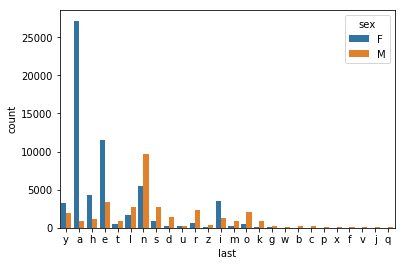

In [5]:
# ploting countplot 
sns.countplot(data['last'],hue=data['sex'])

# Features
 - N-grams
    - bi-grams
    - tri-grams

In [6]:
from nltk import ngrams

In [7]:
# singal grams
a = list(ngrams('srikanth',2))
print(a)

[('s', 'r'), ('r', 'i'), ('i', 'k'), ('k', 'a'), ('a', 'n'), ('n', 't'), ('t', 'h')]


In [8]:
# vreating bi-grams
["".join(gram) for gram in a]
    

['sr', 'ri', 'ik', 'ka', 'an', 'nt', 'th']

In [9]:
# creating function for bi-grams
def bigram(name):
    bi = list(ngrams(name,2))
    return ["".join(gram) for gram in bi]

In [10]:
# example of function with the name srikanth
bigram('srikanth')

['sr', 'ri', 'ik', 'ka', 'an', 'nt', 'th']

In [11]:
# creating tri-grams 
def trigram(name):
    bi = list(ngrams(name,3))
    return ["".join(gram) for gram in bi]

In [12]:
# example of trigram with the name srikanth
trigram('srikanth')

['sri', 'rik', 'ika', 'kan', 'ant', 'nth']

In [13]:
# combning bi-grams , tri-grams and last letter 
name = 'srikanth'
gram = bigram(name) + trigram(name) + [feature_last(name)]
print(gram)

['sr', 'ri', 'ik', 'ka', 'an', 'nt', 'th', 'sri', 'rik', 'ika', 'kan', 'ant', 'nth', 'h']


In [14]:
# picking 1000 male names and 1000 female names from data because of my system to run fast 
female = data[data['sex']=='F'].iloc[:1000]
male = data[data['sex']=='M'].iloc[:1000]

# concating both names data with axis = 0

df = pd.concat((female,male),axis=0,ignore_index=True)

In [15]:
df['sex'].value_counts()

M    1000
F    1000
Name: sex, dtype: int64

In [16]:
# creating a function to extract features 
def feature(name):
    gram = bigram(name) + trigram(name) + [feature_last(name)]
    return gram

In [17]:
# extracting all features using above function
fset = []
for name in df['name']:
    name = name.lower()
    #print(name)
    f = feature(name)
    fset.extend(f)

In [18]:
len(set(fset))

2185

In [19]:
# 
fset = set(fset)
len(fset)

2185

In [20]:
from collections import defaultdict # to create dict of dict 

In [21]:
frame = defaultdict(lambda: defaultdict(lambda:0)) # dict of dict

In [22]:
# creating a frame with initial values = 0
for names in df['name']:
    names = names.lower()
    for key in fset:
        frame[names][key] = 0.0

In [23]:
frame.keys()

dict_keys(['mary', 'anna', 'emma', 'elizabeth', 'minnie', 'margaret', 'ida', 'alice', 'bertha', 'sarah', 'annie', 'clara', 'ella', 'florence', 'cora', 'martha', 'laura', 'nellie', 'grace', 'carrie', 'maude', 'mabel', 'bessie', 'jennie', 'gertrude', 'julia', 'hattie', 'edith', 'mattie', 'rose', 'catherine', 'lillian', 'ada', 'lillie', 'helen', 'jessie', 'louise', 'ethel', 'lula', 'myrtle', 'eva', 'frances', 'lena', 'lucy', 'edna', 'maggie', 'pearl', 'daisy', 'fannie', 'josephine', 'dora', 'rosa', 'katherine', 'agnes', 'marie', 'nora', 'may', 'mamie', 'blanche', 'stella', 'ellen', 'nancy', 'effie', 'sallie', 'nettie', 'della', 'lizzie', 'flora', 'susie', 'maud', 'mae', 'etta', 'harriet', 'sadie', 'caroline', 'katie', 'lydia', 'elsie', 'kate', 'susan', 'mollie', 'alma', 'addie', 'georgia', 'eliza', 'lulu', 'nannie', 'lottie', 'amanda', 'belle', 'charlotte', 'rebecca', 'ruth', 'viola', 'olive', 'amelia', 'hannah', 'jane', 'virginia', 'emily', 'matilda', 'irene', 'kathryn', 'esther', 'willi

In [24]:
# assigning related name keys with = 1
for name in df['name']:
    name = name.lower()
    f = feature(name)
    for fkey in f:
        frame[name][fkey] +=1.0

In [25]:
# creating Dataframe of the above created frame as dframe

dframe = pd.DataFrame(frame).T

In [26]:
# this is how the data lookes after creating DataFrame
dframe

,a,aa,aac,aar,ab,abb,abe,abi,abl,abn,...,zoe,zol,zon,zor,zr,zra,zu,zul,zz,zzi
mary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anna,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
emma,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
elizabeth,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
minnie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
margaret,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ida,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bertha,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sarah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
dframe[dframe['a'].isnull()]

,a,aa,aac,aar,ab,abb,abe,abi,abl,abn,...,zoe,zol,zon,zor,zr,zra,zu,zul,zz,zzi


In [28]:
## applying naive_base model 

In [29]:
from sklearn.naive_bayes import MultinomialNB # importing model from sklearn

In [30]:
model = MultinomialNB() # assigning the model

In [31]:
x = dframe.iloc[:, :].values # indepedent features data 
y = df['sex'].values # taken from the combined male ,female dataset of 1000

In [32]:
x.shape  ,y.shape

((2000, 2185), (2000,))

In [33]:
model.fit(x,y) # model fitting 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
model.score(x,y) # accuracy

0.894

In [35]:
# predicting our model on sample name = Rishika
# before applying model we have to make shure that out input should be formated as same as we given to model

In [36]:
test = defaultdict(lambda: defaultdict(lambda:0))
name = 'Rishika'
name = name.lower()
for key in fset:
    test[name][key] = 0.0
    
f = feature(name)
for fkey in f:
    if fkey in fset:
        test[name][fkey] += 1.0
    
test_array = pd.DataFrame(test).T.values

In [37]:
model.predict(test_array)

array(['F'], dtype='<U1')

In [38]:
len(set(fset))

2185

In [39]:
pd.DataFrame(test).T

,a,aa,aac,aar,ab,abb,abe,abi,abl,abn,...,zoe,zol,zon,zor,zr,zra,zu,zul,zz,zzi
rishika,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
